In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
#Read the dataset/s
df = pd.read_csv('/content/drive/MyDrive/CapstoneProject/heart_attack_prediction_dataset.csv')

In [ ]:
#===pre-processing / Model prediction Development ====
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,521.0,67,1.0,208,2510.0,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,0.0,5.0,1.0,0
1,998.0,21,1.0,389,2815.0,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,3.0,4.0,0.0,0
2,529.0,21,0.0,324,3224.0,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,6.0,3.0,0.0,0
3,3160.0,84,1.0,383,2689.0,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,3.0,4.0,0.0,0
4,2083.0,66,1.0,318,3563.0,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,16.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,4228.0,60,1.0,121,3680.0,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,16.0,1.0,0.0,0
8759,5502.0,28,0.0,120,2434.0,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,3.0,4.0,0.0,0
8760,7837.0,47,1.0,250,2624.0,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,2.0,5.0,1.0,1
8761,1552.0,36,1.0,178,838.0,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,2.0,5.0,1.0,0


In [ ]:
class_label =df['Heart Attack Risk']
df = df.drop(['Heart Attack Risk'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['Heart Attack Risk']=class_label
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,0.059461,0.680556,1.0,0.314286,0.641288,0.457143,0.0,0.0,1.0,0.0,...,0.551234,0.862268,0.602363,0.332468,0.000000,0.333333,0.000000,1.0,1.0,0
1,0.113901,0.041667,1.0,0.960714,0.719213,0.828571,1.0,1.0,1.0,1.0,...,0.413584,0.949316,0.417945,0.266234,0.142857,0.500000,0.157895,0.8,0.0,0
2,0.060374,0.041667,0.0,0.728571,0.823710,0.457143,1.0,0.0,0.0,0.0,...,0.788642,0.768939,0.462573,0.723377,0.571429,0.000000,0.315789,0.6,0.0,0
3,0.360648,0.916667,1.0,0.939286,0.687021,0.471429,1.0,1.0,1.0,0.0,...,0.637413,0.377210,0.839394,0.451948,0.428571,0.000000,0.157895,0.8,0.0,0
4,0.237731,0.666667,1.0,0.707143,0.910322,0.757143,1.0,1.0,1.0,1.0,...,0.126150,0.501954,0.173077,0.261039,0.142857,0.166667,0.842105,0.2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.482538,0.583333,1.0,0.003571,0.940215,0.300000,1.0,1.0,1.0,0.0,...,0.900572,0.769432,0.075179,0.048052,1.000000,0.500000,0.842105,0.2,0.0,0
8759,0.627939,0.138889,0.0,0.000000,0.621870,0.471429,1.0,0.0,0.0,1.0,...,0.319366,0.706769,0.272406,0.762338,0.571429,0.833333,0.157895,0.8,0.0,0
8760,0.894430,0.402778,1.0,0.464286,0.670414,0.928571,0.0,1.0,1.0,1.0,...,0.197861,0.060509,0.791267,0.645455,0.571429,0.000000,0.105263,1.0,1.0,1
8761,0.177129,0.250000,1.0,0.207143,0.214103,0.285714,1.0,0.0,1.0,0.0,...,0.002320,0.678408,0.422448,0.109091,0.285714,0.666667,0.105263,1.0,1.0,0


In [ ]:
#pre-processing
le = preprocessing.LabelEncoder()
Patient_ID = le.fit_transform(list(df["Patient ID"]))
Age = le.fit_transform(list(df["Age"]))
Sex = le.fit_transform(list(df["Sex"]))
Cholesterol = le.fit_transform(list(df["Cholesterol"]))
Heart_Rate = le.fit_transform(list(df["Heart Rate"]))
Diabetes = le.fit_transform(list(df["Diabetes"])) #  Whether the patient has diabetes (1: Yes, 0: No)
Family_History = le.fit_transform(list(df["Family History"])) # Family history of heart-related problems (1: Yes, 0: No)
Smoking = le.fit_transform(list(df["Smoking"])) # Smoking status of the patient (1: Smoker, 0: Non-smoker)
Obesity = le.fit_transform(list(df["Obesity"])) # Obesity status of the patient (1: Obese, 0: Not obese)
Exercise_Hours_Per_Week = le.fit_transform(list(df["Exercise Hours Per Week"]))
Previous_Heart_Problems = le.fit_transform(list(df["Previous Heart Problems"]))
Medication_Use = le.fit_transform(list(df["Medication Use"])) # Medication usage by the patient (1: Yes, 0: No)
Stress_Level = le.fit_transform(list(df["Stress Level"])) # Stress level reported by the patient (1-10)
Sedentary_Hours_Per_Day = le.fit_transform(list(df["Sedentary Hours Per Day"]))
Income = le.fit_transform(list(df["Income"]))
BMI = le.fit_transform(list(df["BMI"]))
Triglycerides = le.fit_transform(list(df["Triglycerides"]))
Physical_Activity_Days_Per_Week = le.fit_transform(list(df["Physical Activity Days Per Week"]))
Sleep_Hours_Per_Day = le.fit_transform(list(df["Sleep Hours Per Day"]))
Heart_Attack_Risk = le.fit_transform(list(df["Heart Attack Risk"])) # Presence of heart attack risk (1: Yes, 0: No)

In [ ]:
x = list(zip(Age, Sex, Cholesterol, Heart_Rate, Diabetes, Family_History, Smoking, Obesity, Exercise_Hours_Per_Week, Previous_Heart_Problems, Medication_Use, Stress_Level, Sedentary_Hours_Per_Day, Income, BMI, Triglycerides, Physical_Activity_Days_Per_Week, Sleep_Hours_Per_Day))
y = list(Heart_Attack_Risk)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'

In [ ]:
# Model Test/Train
# Splitting what we are trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) and similarly for Y(features)
# The test data will test the accuracy of the model created
import sklearn.model_selection
x_train, x_test, y_train, y_test =
sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
# 0.2 means 80% training 20% testing
# If we train the model with higher data it already has seen that information
# and knows we will have better accuracy

In [ ]:
# Size of train and test subsets after splitting
import numpy as np
np.shape(x_train), np.shape(x_test)

((7010, 18), (1753, 18))

In [ ]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

Performance on Training set
NB: 0.645792 (0.014636)

SVM: 0.645792 (0.014636)

GBM: 0.641227 (0.014715)

RF: 0.635806 (0.012252)



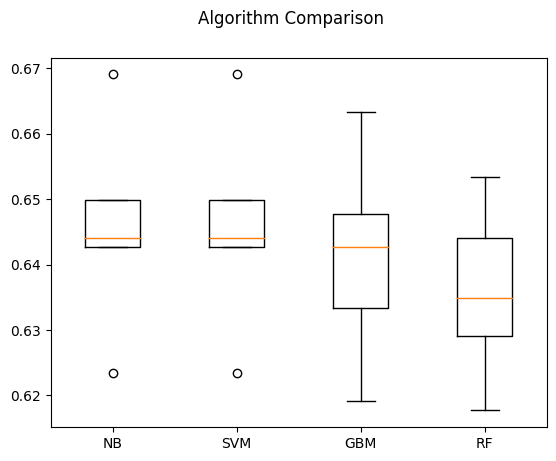

In [ ]:
# Compare Algorithms' Performance
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Model Evaluation by testing with independent/external test data set.
# Make predictions on validation/test dataset

models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()

best_model = nb
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))

Best Model Accuracy Score on Test Set: 0.6257843696520251


In [ ]:
# Model Performance Evaluation Metric 1 - Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1097
           1       0.00      0.00      0.00       656

    accuracy                           0.63      1753
   macro avg       0.31      0.50      0.38      1753
weighted avg       0.39      0.63      0.48      1753



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


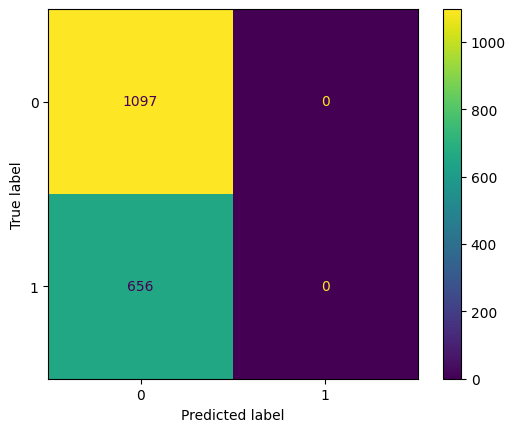

In [ ]:
# Model Performance Evaluation Metric 2
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

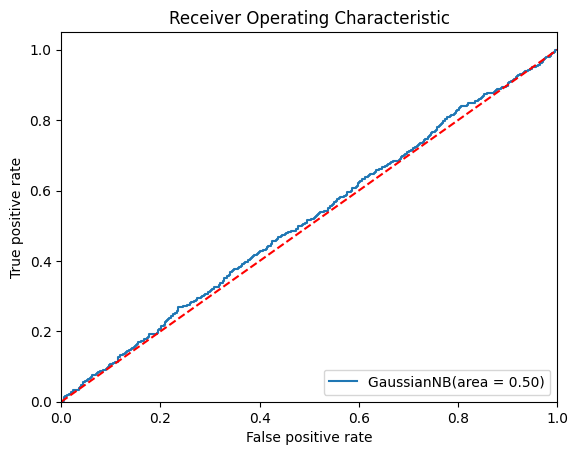

In [ ]:
#Model Evaluation Metric 3
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = nb
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'GaussianNB(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

In [ ]:
#Model Evaluation Metric 4 - prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

Predicted:  0 Actual:  1 Data:  (68, 1, 243, 66, 0, 1, 1, 0, 5432, 1, 1, 0, 7218, 1455, 8645, 337, 3, 4)
Predicted:  0 Actual:  0 Data:  (32, 0, 108, 4, 1, 0, 1, 1, 2865, 0, 1, 6, 6730, 7289, 1094, 593, 3, 3)
Predicted:  0 Actual:  0 Data:  (39, 1, 234, 4, 1, 1, 1, 1, 3824, 0, 0, 5, 5099, 7009, 1717, 103, 7, 5)
Predicted:  0 Actual:  1 Data:  (52, 1, 47, 41, 1, 1, 1, 0, 4315, 0, 1, 2, 8180, 7264, 8110, 160, 0, 2)
Predicted:  0 Actual:  0 Data:  (50, 1, 114, 49, 0, 0, 1, 0, 3706, 0, 1, 5, 6663, 2198, 6073, 61, 3, 6)
Predicted:  0 Actual:  0 Data:  (40, 0, 199, 21, 0, 1, 1, 0, 1403, 0, 0, 4, 2559, 7492, 8278, 386, 5, 1)
Predicted:  0 Actual:  0 Data:  (50, 1, 100, 68, 0, 1, 1, 0, 2178, 0, 1, 8, 7714, 5909, 6267, 323, 3, 4)
Predicted:  0 Actual:  0 Data:  (58, 1, 184, 8, 1, 0, 1, 1, 2604, 1, 0, 3, 1103, 3639, 478, 281, 3, 1)
Predicted:  0 Actual:  1 Data:  (1, 0, 141, 56, 1, 0, 0, 0, 4790, 1, 0, 1, 6630, 5424, 7753, 418, 1, 4)
Predicted:  0 Actual:  1 Data:  (36, 0, 280, 38, 1, 1, 1, 1, 6